In [1]:
import os

import pyproj
import xarray as xr
from xcube.core.store import new_data_store

---
### Monthly gap filled Ocean Colour Climate Change Initiative (OC-CCI) chlorophyll-a 

https://zenodo.org/records/17488521 (only till 2024)

In [2]:
store = new_data_store("zenodo", root="17488521")

In [3]:
store.list_data_ids()

['Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_0.25deg_v0-3.zip',
 'Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_1deg_v0-3.zip']

In [4]:
cache_store = store.preload_data('Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_0.25deg_v0-3.zip')

Data ID,Status,Progress,Message,Exception
Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_0.25deg_v0-3.zip,COMPLETED,-,Already preloaded,-


In [5]:
cache_store.list_data_ids()

['Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_0.25deg_v0-3.nc']

In [6]:
ds = cache_store.open_data(
    "Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_0.25deg_v0-3.nc",
    chunks="auto",
)
ds

<xarray.Dataset> Size: 10GB
Dimensions:                    (longitude: 1440, latitude: 720, time: 336)
Coordinates:
  * longitude                  (longitude) float32 6kB -179.9 -179.6 ... 179.9
  * latitude                   (latitude) float32 3kB -89.88 -89.62 ... 89.88
  * time                       (time) datetime64[ns] 3kB 1997-01-15 ... 2024-...
Data variables:
    OC-CCI_chlor_a             (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
    OC-CCI_chlor_a_log10_rmsd  (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
    OSISAF_ice_conc            (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
    chl_filled                 (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
    chl_filled_unc             (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
    chl_flag                   (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
    chl_process                (time) float32 1kB dask.array<chunksize=(336,), meta=np.ndarray>
    flag_l                     (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
Attributes:
    date_file_generated:    25/09/2025 09:39
    code_by:                Daniel J. Ford (d.ford@exeter.ac.uk)
    start_year:             1997.0
    end_year:               2024.0
    supporting_manuscript:  Daniel J. Ford, Gemma Kulk, Shubha Sathyendranath...
    code_location:          https://github.com/JamieLab/SCOPE-ArgoChla
    averaging_code:         https://github.com/JamieLab/OceanICU

In [7]:
ds = ds.transpose("time", "latitude", "longitude")
ds = ds.chunk(dict(time=1, latitude=-1, longitude=-1))
ds = ds.isel(latitude=slice(None, None, -1))
ds

<xarray.Dataset> Size: 10GB
Dimensions:                    (time: 336, latitude: 720, longitude: 1440)
Coordinates:
  * time                       (time) datetime64[ns] 3kB 1997-01-15 ... 2024-...
  * latitude                   (latitude) float32 3kB 89.88 89.62 ... -89.88
  * longitude                  (longitude) float32 6kB -179.9 -179.6 ... 179.9
Data variables:
    OC-CCI_chlor_a             (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    OC-CCI_chlor_a_log10_rmsd  (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    OSISAF_ice_conc            (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    chl_filled                 (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    chl_filled_unc             (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    chl_flag                   (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    chl_process                (time) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    flag_l                     (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes:
    date_file_generated:    25/09/2025 09:39
    code_by:                Daniel J. Ford (d.ford@exeter.ac.uk)
    start_year:             1997.0
    end_year:               2024.0
    supporting_manuscript:  Daniel J. Ford, Gemma Kulk, Shubha Sathyendranath...
    code_location:          https://github.com/JamieLab/SCOPE-ArgoChla
    averaging_code:         https://github.com/JamieLab/OceanICU

In [8]:
ds_sel = ds.sel(time=slice("2023-04-01", "2023-10-31"), latitude=slice(61, 52), longitude=slice(-4, 12))
ds_sel

<xarray.Dataset> Size: 452kB
Dimensions:                    (time: 7, latitude: 36, longitude: 64)
Coordinates:
  * time                       (time) datetime64[ns] 56B 2023-04-15 ... 2023-...
  * latitude                   (latitude) float32 144B 60.88 60.62 ... 52.12
  * longitude                  (longitude) float32 256B -3.875 -3.625 ... 11.88
Data variables:
    OC-CCI_chlor_a             (time, latitude, longitude) float32 65kB dask.array<chunksize=(1, 36, 64), meta=np.ndarray>
    OC-CCI_chlor_a_log10_rmsd  (time, latitude, longitude) float32 65kB dask.array<chunksize=(1, 36, 64), meta=np.ndarray>
    OSISAF_ice_conc            (time, latitude, longitude) float32 65kB dask.array<chunksize=(1, 36, 64), meta=np.ndarray>
    chl_filled                 (time, latitude, longitude) float32 65kB dask.array<chunksize=(1, 36, 64), meta=np.ndarray>
    chl_filled_unc             (time, latitude, longitude) float32 65kB dask.array<chunksize=(1, 36, 64), meta=np.ndarray>
    chl_flag                   (time, latitude, longitude) float32 65kB dask.array<chunksize=(1, 36, 64), meta=np.ndarray>
    chl_process                (time) float32 28B dask.array<chunksize=(1,), meta=np.ndarray>
    flag_l                     (time, latitude, longitude) float32 65kB dask.array<chunksize=(1, 36, 64), meta=np.ndarray>
Attributes:
    date_file_generated:    25/09/2025 09:39
    code_by:                Daniel J. Ford (d.ford@exeter.ac.uk)
    start_year:             1997.0
    end_year:               2024.0
    supporting_manuscript:  Daniel J. Ford, Gemma Kulk, Shubha Sathyendranath...
    code_location:          https://github.com/JamieLab/SCOPE-ArgoChla
    averaging_code:         https://github.com/JamieLab/OceanICU

In [9]:
ds_sel = ds_sel.drop_vars(("OC-CCI_chlor_a_log10_rmsd", "chl_filled_unc"))
ds_sel["OC-CCI_chlor_a"] = 10**ds_sel["OC-CCI_chlor_a"]
ds_sel["chl_filled"] = 10**ds_sel["chl_filled"]
ds_sel

<xarray.Dataset> Size: 323kB
Dimensions:          (time: 7, latitude: 36, longitude: 64)
Coordinates:
  * time             (time) datetime64[ns] 56B 2023-04-15 ... 2023-10-15
  * latitude         (latitude) float32 144B 60.88 60.62 60.38 ... 52.38 52.12
  * longitude        (longitude) float32 256B -3.875 -3.625 ... 11.62 11.88
Data variables:
    OC-CCI_chlor_a   (time, latitude, longitude) float32 65kB dask.array<chunksize=(1, 36, 64), meta=np.ndarray>
    OSISAF_ice_conc  (time, latitude, longitude) float32 65kB dask.array<chunksize=(1, 36, 64), meta=np.ndarray>
    chl_filled       (time, latitude, longitude) float32 65kB dask.array<chunksize=(1, 36, 64), meta=np.ndarray>
    chl_flag         (time, latitude, longitude) float32 65kB dask.array<chunksize=(1, 36, 64), meta=np.ndarray>
    chl_process      (time) float32 28B dask.array<chunksize=(1,), meta=np.ndarray>
    flag_l           (time, latitude, longitude) float32 65kB dask.array<chunksize=(1, 36, 64), meta=np.ndarray>
Attributes:
    date_file_generated:    25/09/2025 09:39
    code_by:                Daniel J. Ford (d.ford@exeter.ac.uk)
    start_year:             1997.0
    end_year:               2024.0
    supporting_manuscript:  Daniel J. Ford, Gemma Kulk, Shubha Sathyendranath...
    code_location:          https://github.com/JamieLab/SCOPE-ArgoChla
    averaging_code:         https://github.com/JamieLab/OceanICU

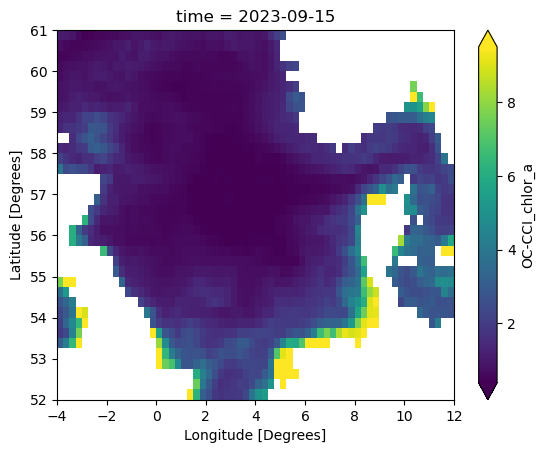

In [10]:
ds_sel["OC-CCI_chlor_a"].isel(time=5).plot(robust=True)

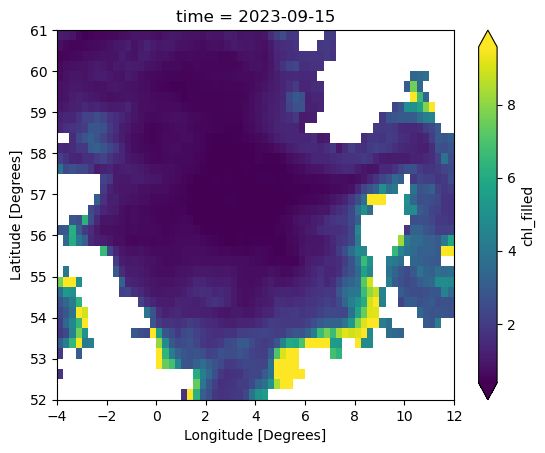

In [11]:
ds_sel["chl_filled"].isel(time=5).plot(robust=True)

In [12]:
team_store = new_data_store(
    "s3", 
    root=os.environ["S3_USER_STORAGE_BUCKET"], 
    storage_options=dict(
        anon=False, 
        key=os.environ["S3_USER_STORAGE_KEY"], 
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    )
)
team_store.list_data_ids()

['oc_cci.zarr',
 'oc_glo_cmems_300m.zarr',
 'oc_glo_cmems_4km.zarr',
 'oc_nws_cmems.zarr',
 'sen2_l2a.levels',
 'sen2l2a.levels',
 'sen2l2a0.levels',
 'sen2l2a2.levels',
 'sen2l2a3.levels',
 'sen2l2a_stavanger_large0.zarr',
 'sen2l2a_stavanger_large2.zarr',
 'sen2l2a_stavanger_large3.zarr']

In [13]:
%%time
team_store.write_data(ds_sel,'oc_cci.zarr', replace=True)

CPU times: user 912 ms, sys: 2.19 s, total: 3.1 s
Wall time: 29.9 s


'oc_cci.zarr'